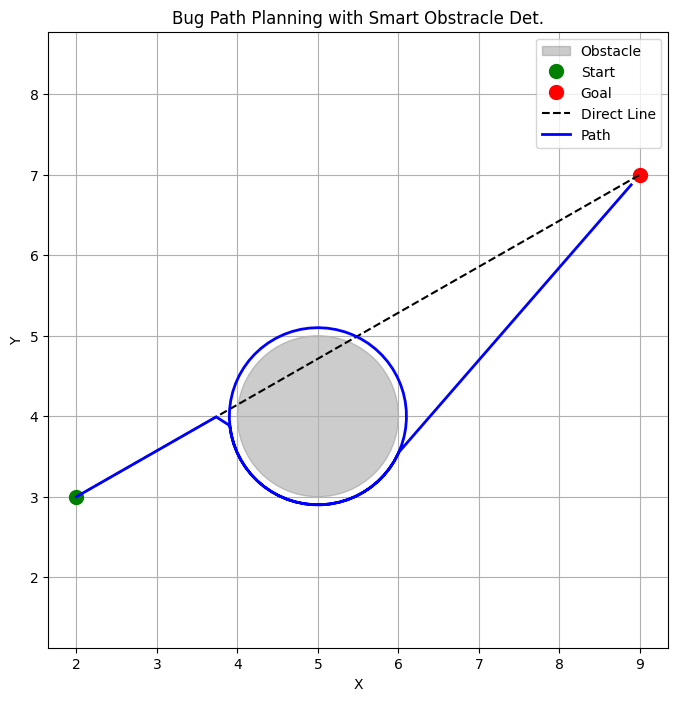

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parivesham ni nirvachinchadam
madhyakendram = np.array([5, 4])
vyaasaartham = 1
prarambham = np.array([2, 3])
lakshyam = np.array([9, 7])
dari = [prarambham]

# A point is inside the obstacle?
def addankilo_unda(sthaanam):
    return np.linalg.norm(sthaanam - madhyakendram) <= vyaasaartham + 0.1

# Line hits the obstacle?
def rekha_addanki_takutunda(pr1, pr2):
    disha = pr2 - pr1
    madhya = pr1 - madhyakendram
    a = np.dot(disha, disha)
    b = 2 * np.dot(madhya, disha)
    c = np.dot(madhya, madhya) - vyaasaartham**2
    vivarana = b**2 - 4*a*c
    return vivarana >= 0

# Mukhya loop
sthiti = prarambham.copy()
sanku_size = 0.2
stithi_mode = 'veladi_lakshyam'
max_sankhya = 1000

for _ in range(max_sankhya):
    if np.linalg.norm(sthiti - lakshyam) < 0.3:
        break

    if stithi_mode == 'veladi_lakshyam':
        if addankilo_unda(sthiti):
            stithi_mode = 'chuttu_addankini'
            konam = np.arctan2(sthiti[1] - madhyakendram[1], sthiti[0] - madhyakendram[0])
        else:
            vela = lakshyam - sthiti
            disha = vela / np.linalg.norm(vela)
            kotta_sthiti = sthiti + sanku_size * disha
            if addankilo_unda(kotta_sthiti):
                stithi_mode = 'chuttu_addankini'
                konam = np.arctan2(sthiti[1] - madhyakendram[1], sthiti[0] - madhyakendram[0])
            else:
                sthiti = kotta_sthiti
                dari.append(sthiti.copy())
    elif stithi_mode == 'chuttu_addankini':
        # Move clockwise around obstacle
        konam += 0.1
        kotta_sthiti = madhyakendram + (vyaasaartham + 0.1) * np.array([np.cos(konam), np.sin(konam)])
        dari.append(kotta_sthiti.copy())
        sthiti = kotta_sthiti

        # Check if we can resume towards goal
        if not rekha_addanki_takutunda(sthiti, lakshyam):
            stithi_mode = 'veladi_lakshyam'

# Chitra nirmanam
dari = np.array(dari)
fig, ax = plt.subplots(figsize=(8, 8))
ax.add_patch(plt.Circle(madhyakendram, vyaasaartham, color='gray', alpha=0.4, label='Obstacle'))
ax.plot(prarambham[0], prarambham[1], 'go', markersize=10, label='Start')
ax.plot(lakshyam[0], lakshyam[1], 'ro', markersize=10, label='Goal')
ax.plot([prarambham[0], lakshyam[0]], [prarambham[1], lakshyam[1]], 'k--', label='Direct Line')
ax.plot(dari[:, 0], dari[:, 1], 'b-', linewidth=2, label='Path')
ax.set_title("Bug Path Planning with Smart Obstracle Det.")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.axis("equal")
ax.grid(True)
ax.legend()
plt.show()